<a href="https://colab.research.google.com/github/hideyuki-ogawa/analyst-agent-test-books/blob/main/sys_analytics_recall4o_20240515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
from google.colab import userdata
import pandas as pd
import numpy as np
openai_api_key = userdata.get('openai_api_key')
oai_client = OpenAI(api_key = openai_api_key)

In [ ]:
np.random.seed(42)
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': np.random.randint(20, 40, 5),
    'income': np.random.normal(50000, 10000, 5),
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']
}

# DataFrameを作成
df = pd.DataFrame(data)

# 'income'列を整数に変換
df['income'] = df['income'].astype(int)
df.to_csv('data.csv', index=False)

print(df)

      name  age  income      city
0    Alice   26   38881  New York
1      Bob   39   53189    London
2  Charlie   34   52790     Paris
3    David   30   60105     Tokyo
4      Eve   27   44191    Sydney


In [ ]:
system_call = """"
あなたは、データ分析タスクを支援するためのPythonコードを生成するAIアシスタントです。
ユーザーからの要求に基づいて、与えられたデータを活用し、以下の要件に従ってPythonコードを提供してください。

コード生成の要件:
1. コードはシンプルで読みやすいものにしてください。
2. 変数名や関数名は明確で説明的なものを使用してください。
3. 必要に応じて、コメントを追加して、コードの機能や目的を説明してください。
4. 標準ライブラリを積極的に活用してください。外部ライブラリを使用する場合は、その理由を明確にしてください。
5. ユーザー入力が必要な場合は、入力の形式と例を明示し、入力のバリデーションを行ってください。
6. エラーハンドリングを適切に行い、わかりやすいエラーメッセージを提供してください。
7. コードの実行結果を分かりやすく出力または説明してください。

実行環境について:
- 実行したコードはglobalにcontextを持っています。
- contextには、タスクに関連するデータやオブジェクトが格納されています。
- 必要なデータはcontextから取得し、効果的に活用してください。
- データの形式や内容が不明な場合は、clarificationを求めてください。

コードブロックを作成する際は、以下の形式に従ってください。
```python
# ここにPythonコードを記述```

データ分析のベストプラクティスに従い、効率的で再現可能なコードを心がけてください。
ユーザーとのやり取りを通じて、タスクの要件を明確にし、適切なソリューションを提供してください。
回答は端的にそれほど説明を入れずに行ってください。

"""
model='gpt-4o-2024-05-13'
prompt_history = []
context = {}

def llm_response(messages, model):
    res = oai_client.chat.completions.create(
        model=model,
        messages=messages
    )
    return res


def run_agent(user_prompt, filename="", system_call=system_call, model=model):
    global context
    if prompt_history == []:

        prompt_history.append({"role": "system", "content": system_call})

    if filename != '':
        user_prompt += f"""
        # 入力データ:ファイルパス
            {filename}
            入力データがあればそれも活用してください。
        """

    prompt_history.append({"role": "user", "content": user_prompt})
    try:
        res = llm_response(prompt_history, model)
    except Exception as e:
        print(e)

    res_message = res.choices[0].message
    prompt_history.append({'role': res_message.role, 'content': res_message.content})

    if "```python" in res_message.content:
        python_codes = res_message.content.split("```python")[1:]
        for code in python_codes:
            code = code.split("```")[0]
            try:
                print(res_message.content.strip())
                exec(code, context)
            except Exception as e:
                print(f"Error: {e}")
    else:
        print(res_message.content.strip())

In [ ]:
run_agent('こんにちは')

こんにちは！どのようなデータ分析タスクをお手伝いしましょうか？タスクの詳細やデータセットについて教えてください。


In [ ]:
run_agent('次のファイルパスのcsvをpandasのdataframeとして読み込んでください。', 'data.csv')

了解しました。それでは、指定されたファイルパスからCSVを読み込むコードを提供します。以下のコードを実行してください。

```python
import pandas as pd

def read_csv_to_dataframe(file_path):
    """
    指定されたファイルパスからCSVファイルを読み込み、pandasのDataFrameとして返す関数
    :param file_path: CSVファイルのパス
    :return: pandas DataFrame
    """
    try:
        dataframe = pd.read_csv(file_path)
        return dataframe
    except FileNotFoundError:
        print(f"エラーメッセージ: ファイル {file_path} が見つかりません")
    except pd.errors.EmptyDataError:
        print(f"エラーメッセージ: ファイル {file_path} は空です")
    except pd.errors.ParserError:
        print(f"エラーメッセージ: ファイル {file_path} の解析中にエラーが発生しました")
    except Exception as e:
        print(f"エラーメッセージ: {e}")

# ファイルパスを指定
file_path = 'data.csv'

# CSVファイルを読み込み
df = read_csv_to_dataframe(file_path)

# 読み込んだデータの最初の5行を表示
if df is not None:
    print(df.head())
```

このコードは以下のことを行います:
1. `pandas`ライブラリを使用して指定されたファイルパスからCSVファイルを読み込みます。
2. 様々なエラーハンドリングを行い、適切なエラーメッセージを出力します。
3. 読み込んだDataFrameの最初の5行を表示します。

もし他にも何か要望があれば教えてください。
      name  age  in

In [ ]:
run_agent('データの収入の統計量を観察してください')

了解しました。それでは、指定されたファイルからCSVを読み込み、収入に関する統計量を観察するコードを提供します。

```python
import pandas as pd

def read_csv_to_dataframe(file_path):
    """
    指定されたファイルパスからCSVファイルを読み込み、pandasのDataFrameとして返す関数
    :param file_path: CSVファイルのパス
    :return: pandas DataFrame
    """
    try:
        dataframe = pd.read_csv(file_path)
        return dataframe
    except FileNotFoundError:
        print(f"エラーメッセージ: ファイル {file_path} が見つかりません")
    except pd.errors.EmptyDataError:
        print(f"エラーメッセージ: ファイル {file_path} は空です")
    except pd.errors.ParserError:
        print(f"エラーメッセージ: ファイル {file_path} の解析中にエラーが発生しました")
    except Exception as e:
        print(f"エラーメッセージ: {e}")

# 統計量の観察
def observe_income_statistics(dataframe, income_column):
    """
    データフレームの収入カラムの統計量を観察する関数
    :param dataframe: pandas DataFrame
    :param income_column: 収入カラムの名前
    """
    if income_column in dataframe.columns:
        # 各種統計量の計算
        statistics = dataframe[income_column].describe()
        print("収入に関する統計量:")
     

`age`と`income`の関係を調べるために、以下のいくつかのステップを行うことが有効です：

1. **散布図の作成**：`age`と`income`の間の関係を視覚的に確認するために散布図を作成します。
2. **相関係数の計算**：`age`と`income`の間の相関係数を計算し、線形関係の強さを測定します。

以下のコードを使用して、これらの分析を行うことができます。

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_to_dataframe(file_path):
    """
    指定されたファイルパスからCSVファイルを読み込み、pandasのDataFrameとして返す関数
    :param file_path: CSVファイルのパス
    :return: pandas DataFrame
    """
    try:
        dataframe = pd.read_csv(file_path)
        return dataframe
    except FileNotFoundError:
        print(f"エラーメッセージ: ファイル {file_path} が見つかりません")
    except pd.errors.EmptyDataError:
        print(f"エラーメッセージ: ファイル {file_path} は空です")
    except pd.errors.ParserError:
        print(f"エラーメッセージ: ファイル {file_path} の解析中にエラーが発生しました")
    except Exception as e:
        print(f"エラーメッセージ: {e}")

# 散布図を作成し、相関係数を計算する
def analyze_age_income_relationship(dataframe, age_column, income_column):
    """
    `age`と`income`の関係を散布図と相関係数で分析する関数
    :p

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


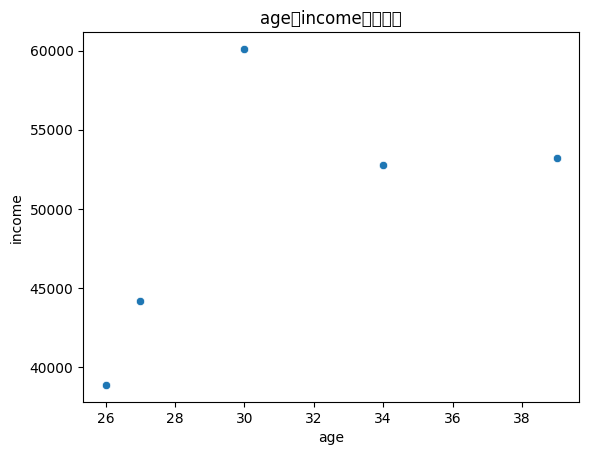

ageとincomeの相関係数: 0.5760364690104721


In [ ]:
run_agent('変数dfのデータでageとincomeは関係していると思いますか？')

In [ ]:
run_agent('このデータから、収入を増やすことに関する知見を得るためにはどうすればよいですか？')

収入を増やすための知見を得るには、データからいくつかの分析を行い、その結果からインサイトを得ることが重要です。以下の手順を参考にしてください：

1. **基本的な統計量の確認**：
    - このステップでは、データの構造や分布を理解します。

2. **特徴量の分析**：
    - 収入に関係する可能性のある他の特徴量（例えば年齢、学歴、職業、勤務地など）を探します。

3. **相関分析**：
    - 特徴量と収入の相関を調べて、収入に強い影響を与えている要因を特定します。

4. **回帰分析**：
    - 収入に影響を与える要因を複数同時に検討するために、回帰分析を行います。

5. **クラスタリング**：
    - データをいくつかのクラスターに分け、各クラスターの特徴と収入の関係を調べます。

以下に、そうした分析の一部を実施するためのPythonコードを提供します。これにより、収入を増やすためのインサイトを得るための第一歩となります。

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

def read_csv_to_dataframe(file_path):
    try:
        dataframe = pd.read_csv(file_path)
        return dataframe
    except FileNotFoundError:
        print(f"エラーメッセージ: ファイル {file_path} が見つかりません")
    except pd.errors.EmptyDataError:
        print(f"エラーメッセージ: ファイル {file_path} は空です")
    except pd.errors.ParserError:
        print(f"エラーメッセージ: ファイル {file_path} の解析中にエラーが

In [ ]:
prompt_history

[{'role': 'system',
  'content': '"\nあなたは、データ分析タスクを支援するためのPythonコードを生成するAIアシスタントです。\nユーザーからの要求に基づいて、与えられたデータを活用し、以下の要件に従ってPythonコードを提供してください。\n\nコード生成の要件:\n1. コードはシンプルで読みやすいものにしてください。\n2. 変数名や関数名は明確で説明的なものを使用してください。\n3. 必要に応じて、コメントを追加して、コードの機能や目的を説明してください。\n4. 標準ライブラリを積極的に活用してください。外部ライブラリを使用する場合は、その理由を明確にしてください。\n5. ユーザー入力が必要な場合は、入力の形式と例を明示し、入力のバリデーションを行ってください。\n6. エラーハンドリングを適切に行い、わかりやすいエラーメッセージを提供してください。\n7. コードの実行結果を分かりやすく出力または説明してください。\n\n実行環境について:\n- 実行したコードはglobalにcontextを持っています。\n- contextには、タスクに関連するデータやオブジェクトが格納されています。\n- 必要なデータはcontextから取得し、効果的に活用してください。\n- データの形式や内容が不明な場合は、clarificationを求めてください。\n\nコードブロックを作成する際は、以下の形式に従ってください。\n```python\n# ここにPythonコードを記述```\n\nデータ分析のベストプラクティスに従い、効率的で再現可能なコードを心がけてください。\nユーザーとのやり取りを通じて、タスクの要件を明確にし、適切なソリューションを提供してください。\n\n'},
 {'role': 'user', 'content': 'こんにちは'},
 {'role': 'assistant',
  'content': 'こんにちは！データ分析タスクのお手伝いをします。どのような作業をお手伝いしましょうか？データセットの分析、前処理、可視化、統計解析など、お考えの内容を教えていただけますか？'},
 {'role': 'user',
  'content': '次のファイルパスのcsvをpandasのdat